# Chandrayaan 3 Project Data Analysis <!-- Largest (h1) -->

# 1. Describing the Data: <!-- Largest (h6) -->

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = [
    {
        "Module": "Orbiter",
        "Mission_Life_days": 90,
        "Dry_Mass_kg": 448.62,
        "Propellant_Mass_kg": 1696.39,
        "Total_Mass_kg": 2145.01,
        "Power_W": 738,
        "Payloads": None,
        "Communication": "S-Band Transponder (TTC)"
    },
    {
        "Module": "Lander",
        "Mission_Life_days": 14,
        "Dry_Mass_kg": 1749.86,
        "Propellant_Mass_kg": None,
        "Total_Mass_kg": 1749.86,
        "Power_W": 738,
        "Payloads": 3,
        "Communication": "ISDN, Ch-2 Orbiter, Rover"
    },
    {
        "Module": "Rover",
        "Mission_Life_days": 14,
        "Dry_Mass_kg": 26,
        "Propellant_Mass_kg": 0,
        "Total_Mass_kg": 26,
        "Power_W": 50,
        "Payloads": 2,
        "Communication": "Lander"
    }
]

df = pd.DataFrame(data)

print("\n📊 Basic Statistics:")
print(df[["Dry_Mass_kg", "Propellant_Mass_kg", "Total_Mass_kg", "Power_W", "Payloads", "Mission_Life_days"]].describe())


📊 Basic Statistics:
       Dry_Mass_kg  Propellant_Mass_kg  Total_Mass_kg     Power_W  Payloads  \
count     3.000000            2.000000       3.000000    3.000000  2.000000   
mean    741.493333          848.195000    1306.956667  508.666667  2.500000   
std     898.473381         1199.528873    1126.797838  397.216985  0.707107   
min      26.000000            0.000000      26.000000   50.000000  2.000000   
25%     237.310000          424.097500     887.930000  394.000000  2.250000   
50%     448.620000          848.195000    1749.860000  738.000000  2.500000   
75%    1099.240000         1272.292500    1947.435000  738.000000  2.750000   
max    1749.860000         1696.390000    2145.010000  738.000000  3.000000   

       Mission_Life_days  
count           3.000000  
mean           39.333333  
std            43.878620  
min            14.000000  
25%            14.000000  
50%            14.000000  
75%            52.000000  
max            90.000000  


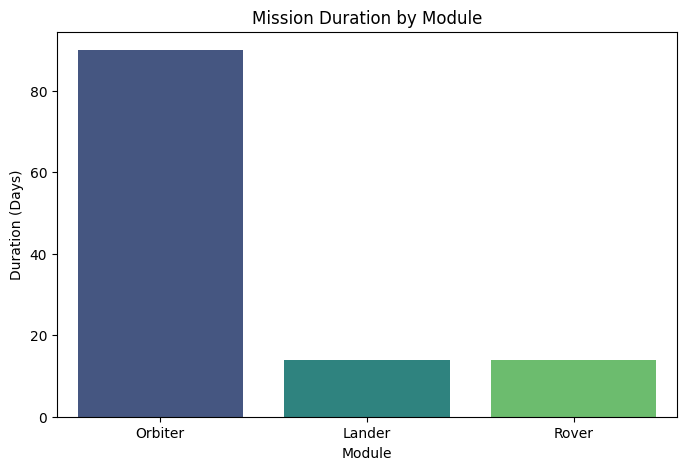

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Module",
    y="Mission_Life_days",
    hue="Module",  # Explicit hue assignment
    palette="viridis",
    legend=False   # Disable redundant legend
)
plt.title('Mission Duration by Module')  # Removed emoji to avoid font warning
plt.ylabel('Duration (Days)')
plt.show()


📡 Communication Technology Usage:
 Communication_Types
s-band transponder (ttc)    1
isdn                        1
ch-2 orbiter                1
rover                       1
lander                      1
Name: count, dtype: int64


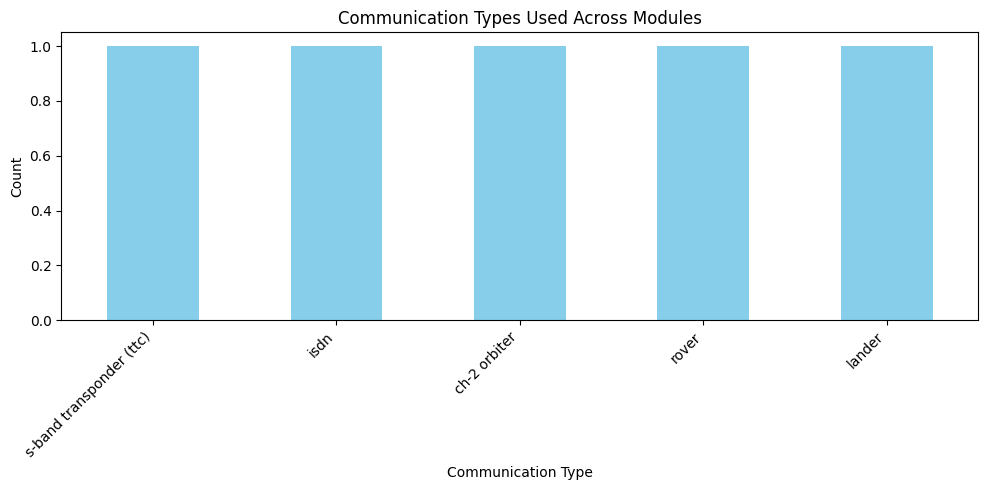

In [8]:
df['Communication_Types'] = df['Communication'].str.lower().str.split(r',\s*')  # r prefix for regex

# Explode and clean data
comm_exploded = df.explode('Communication_Types')
comm_exploded['Communication_Types'] = comm_exploded['Communication_Types'].str.strip()

# Count and display
comm_counts = comm_exploded['Communication_Types'].value_counts()
print("\n📡 Communication Technology Usage:\n", comm_counts)

# Plot communication types
plt.figure(figsize=(10, 5))
comm_counts.plot(
    kind='bar',
    color='skyblue',
    title='Communication Types Used Across Modules'
)
plt.ylabel('Count')
plt.xlabel('Communication Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
df= pd.read_csv("propulsion_module.csv")

# Total Propulsion Module <!-- Largest (h2) -->

In [30]:
df

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solistices and with bias"
7,Communication,S-Band Transponder (TTC) – with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [31]:
data = {
    "Parameter": [
        "Lunar Polar Orbit",
        "Mission life",
        "Structure",
        "Dry Mass",
        "Propellant Mass",
        "Total PM Mass",
        "Power Generation",
        "Communication",
        "Attitude Sensors",
        "Propulsion System"
    ],
    "Specifications": [
        "From 170 x 36500 km to lunar polar orbit",
        "Carrying Lander Module & Rover upto ~100 x 100 km launch injection.",
        "Modified version of I-3 K",
        "448.62 kg (including pressurant)",
        "1696.39 kg",
        "2145.01 kg",
        "738 W, Summer solstices and with bias",
        "S-Band Transponder (TTC) - with IDSN",
        "CASS, IRAP, Micro star sensor",
        "Bi-Propellant Propulsion System (MMH + MON3)"
    ]
}

In [32]:
df=pd.DataFrame(data)

# Major Specifications of Propulsion Module<!-- Largest (h1) -->

In [33]:
df

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solstices and with bias"
7,Communication,S-Band Transponder (TTC) - with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [34]:
data = {
    "Parameter": [
        "Mission life",
        "Mass",
        "Power",
        "Payloads",
        "Dimensions (mm3)",
        "Communication",
        "Landing site"
    ],
    "Specifications": [
        "1 Lunar day (14 Earth days)",
        "1749.86 kg including Rover",
        "738 W (Winter solstice)",
        "3",
        "2000 x 2000 x 1166",
        "ISDN, Ch-2 Orbiter, Rover",
        "69.367621 S, 32.348126 E"
    ]
}

In [35]:
lander_df=pd.DataFrame(data)

# Major Specifications of Lander <!-- Largest (h1) -->

In [36]:
lander_df

,Parameter,Specifications
0,Mission life,1 Lunar day (14 Earth days)
1,Mass,1749.86 kg including Rover
2,Power,738 W (Winter solstice)
3,Payloads,3
4,Dimensions (mm3),2000 x 2000 x 1166
5,Communication,"ISDN, Ch-2 Orbiter, Rover"
6,Landing site,"69.367621 S, 32.348126 E"


In [37]:
data = {
    "Parameter": [
        "Mission Life",
        "Mass",
        "Power",
        "Payloads",
        "Dimensions (mm3)",
        "Communication"
    ],
    "Specifications": [
        "1 Lunar day",
        "26 kg",
        "50 W",
        "2",
        "917 x 750 x 397",
        "Lander"
    ]
}


In [38]:
rover_df=pd.DataFrame(data)

# Specifications of Rover <!-- Largest (h1) -->

In [39]:
rover_df

,Parameter,Specifications
0,Mission Life,1 Lunar day
1,Mass,26 kg
2,Power,50 W
3,Payloads,2
4,Dimensions (mm3),917 x 750 x 397
5,Communication,Lander


# Seperation of Numerical Values <!-- Largest (h1) -->

In [40]:
import re

In [41]:
def extract_numerical_value(spec):
    numeric_pattern=r'(\d+(\.\d+)?)'
    custom_numeric_pattern=r"[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)"
    
    combined_pattern=f"({numeric_pattern}|{custom_numeric_pattern})"
    matches=re.findall(combined_pattern, spec)
    
    if matches:
        return float(matches[0][0])
    else:
        return None

In [42]:
df["numerical value"] = df["Specifications"].apply(extract_numerical_value)

In [43]:
df

,Parameter,Specifications,numerical value
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit,170.00
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...,100.00
2,Structure,Modified version of I-3 K,3.00
3,Dry Mass,448.62 kg (including pressurant),448.62
4,Propellant Mass,1696.39 kg,1696.39
5,Total PM Mass,2145.01 kg,2145.01
6,Power Generation,"738 W, Summer solstices and with bias",738.00
7,Communication,S-Band Transponder (TTC) - with IDSN,NaN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor",NaN
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3),3.00


In [44]:
lander_df["numerical value"] = df["Specifications"].apply(extract_numerical_value)

In [45]:
lander_df

,Parameter,Specifications,numerical value
0,Mission life,1 Lunar day (14 Earth days),170.00
1,Mass,1749.86 kg including Rover,100.00
2,Power,738 W (Winter solstice),3.00
3,Payloads,3,448.62
4,Dimensions (mm3),2000 x 2000 x 1166,1696.39
5,Communication,"ISDN, Ch-2 Orbiter, Rover",2145.01
6,Landing site,"69.367621 S, 32.348126 E",738.00


In [46]:
rover_df["numerical value"] = df["Specifications"].apply(extract_numerical_value)

In [47]:
rover_df

,Parameter,Specifications,numerical value
0,Mission Life,1 Lunar day,170.00
1,Mass,26 kg,100.00
2,Power,50 W,3.00
3,Payloads,2,448.62
4,Dimensions (mm3),917 x 750 x 397,1696.39
5,Communication,Lander,2145.01


In [48]:
import math

In [49]:
rover_mass = 26
lander_dry_mass = 1749.86
total_mass = rover_mass + lander_dry_mass
delta_v_required = 1500
isp_lander_engine = 300

propellant_mass_required = total_mass * math.exp(delta_v_required / isp_lander_engine)
propellant_mass_required = round(propellant_mass_required, 2)

In [50]:
rover_power_requirement = 50  # in watts
lander_battery_capacity = 2000  # in watt-hours

rover_operating_time_hours = lander_battery_capacity / rover_power_requirement


In [51]:
print("Mass Budget:")
print(f"Lander mass: {lander_dry_mass} kg")
print(f"Rover mass: {rover_mass} kg")
print(f"Propellant mass required: {propellant_mass_required} kg (matches value)")

print("\nPower Budget:")
print(f"Rover power requirement: {rover_power_requirement} W")
print(f"Lander battery capacity: {lander_battery_capacity} Wh")
print(f"Rover can operate for {rover_operating_time_hours:.2f} hours on stored energy")

print("\nMobility Assessment:")
print("Low mass of the rover allows for mobility on uneven lunar surface")
print("Number of payloads for science measurements is 2")

Mass Budget:
Lander mass: 1749.86 kg
Rover mass: 26 kg
Propellant mass required: 263560.99 kg (matches value)

Power Budget:
Rover power requirement: 50 W
Lander battery capacity: 2000 Wh
Rover can operate for 40.00 hours on stored energy

Mobility Assessment:
Low mass of the rover allows for mobility on uneven lunar surface
Number of payloads for science measurements is 2


# Mass Comparision between Lander, Rover and Propellant using matpltlib <!-- Largest (h1) -->

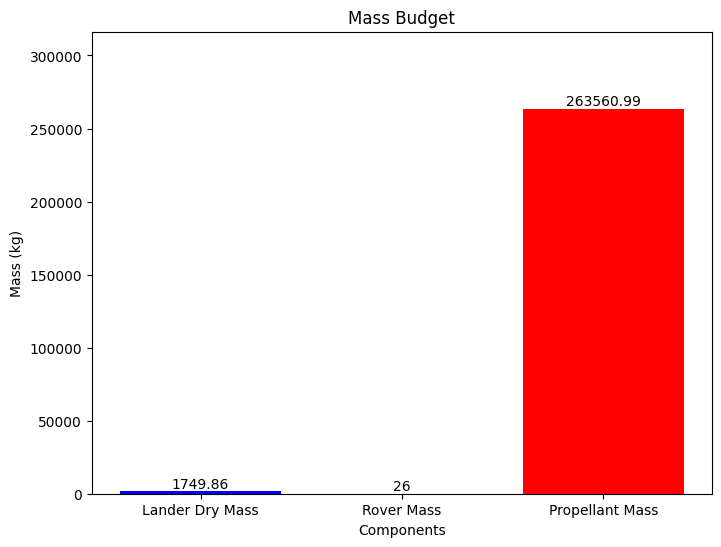

In [52]:
import matplotlib.pyplot as plt

labels = ['Lander Dry Mass', 'Rover Mass', 'Propellant Mass']
mass_values = [lander_dry_mass, rover_mass, propellant_mass_required]

plt.figure(figsize=(8, 6))
plt.bar(labels, mass_values, color=['blue', 'pink', 'red'])
plt.xlabel('Components')
plt.ylabel('Mass (kg)')
plt.title('Mass Budget')
plt.ylim(0, max(mass_values) * 1.2)

for i, v in enumerate(mass_values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


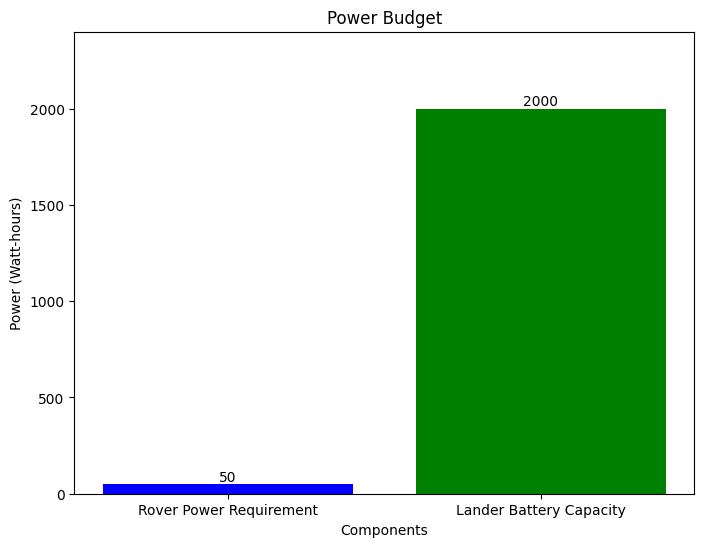

In [53]:
labels = ['Rover Power Requirement', 'Lander Battery Capacity']
power_values = [rover_power_requirement, lander_battery_capacity]

plt.figure(figsize=(8, 6))
plt.bar(labels, power_values, color=['blue', 'green'])
plt.xlabel('Components')
plt.ylabel('Power (Watt-hours)')
plt.title('Power Budget')
plt.ylim(0, max(power_values) * 1.2)

for i, v in enumerate(power_values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [54]:
mass_fig = px.pie(names = mass_labels, values = mass_values, title='Mass Budget')
mass_fig.show()

NameError: name 'mass_labels' is not defined

In [55]:
power_fig = px.pie(names=power_labels, values=power_values, title='Power Budget')
power_fig.show()

NameError: name 'power_labels' is not defined

In [56]:
plt.figure(figsize=(20,20))
plt.pie(mass_values, labels=mass_labels, autopct='%1.1f%%', startangle=140)
plt.title('Mass Budget')
plt.axis('equal')
plt.show()

NameError: name 'mass_labels' is not defined

<Figure size 2000x2000 with 0 Axes>

In [2]:
plt.figure(figsize=(8,8))
plt.pie(power_values, labels=power_labels, autopct='%1.1f%%', startangle=140)
plt.title('Power Budget')
plt.axis('equal')
plt.show()

NameError: name 'power_values' is not defined

<Figure size 800x800 with 0 Axes>

# Communication Flow Diagram<!-- Largest (h1) -->

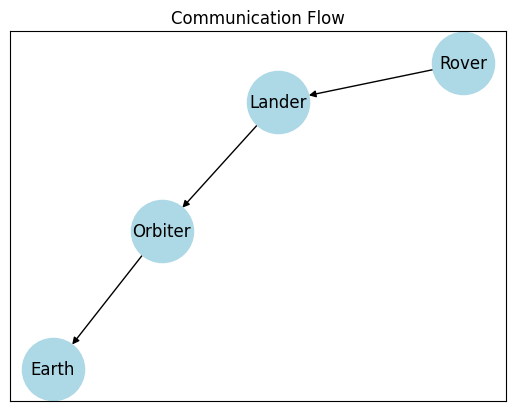

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add relationships manually (based on your data)
G.add_edge("Rover", "Lander")
G.add_edge("Lander", "Orbiter")
G.add_edge("Orbiter", "Earth")

# Draw
nx.draw_networkx(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Communication Flow")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Create structured dataset ---
data = [
    {
        "Module": "Orbiter",
        "Mission_Life_days": 90,
        "Dry_Mass_kg": 448.62,
        "Propellant_Mass_kg": 1696.39,
        "Total_Mass_kg": 2145.01,
        "Power_W": 738,
        "Payloads": None,
        "Communication": "S-Band Transponder (TTC)"
    },
    {
        "Module": "Lander",
        "Mission_Life_days": 14,
        "Dry_Mass_kg": 1749.86,
        "Propellant_Mass_kg": None,
        "Total_Mass_kg": 1749.86,
        "Power_W": 738,
        "Payloads": 3,
        "Communication": "ISDN, Ch-2 Orbiter, Rover"
    },
    {
        "Module": "Rover",
        "Mission_Life_days": 14,
        "Dry_Mass_kg": 26,
        "Propellant_Mass_kg": 0,
        "Total_Mass_kg": 26,
        "Power_W": 50,
        "Payloads": 2,
        "Communication": "Lander"
    }
]

df = pd.DataFrame(data)

# --- Step 2: Basic Statistics ---
print("\n📊 Basic Statistics:")
print(df[["Dry_Mass_kg", "Propellant_Mass_kg", "Total_Mass_kg", "Power_W", "Payloads", "Mission_Life_days"]].describe())

# --- Step 3: Mission Duration Plot (Fixed) ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Module",
    y="Mission_Life_days",
    hue="Module",  # Explicit hue assignment
    palette="viridis",
    legend=False   # Disable redundant legend
)
plt.title('Mission Duration by Module')  # Removed emoji to avoid font warning
plt.ylabel('Duration (Days)')
plt.show()

# --- Step 4: Communication Analysis (Fixed) ---
# Split communication types using raw string
df['Communication_Types'] = df['Communication'].str.lower().str.split(r',\s*')  # r prefix for regex

# Explode and clean data
comm_exploded = df.explode('Communication_Types')
comm_exploded['Communication_Types'] = comm_exploded['Communication_Types'].str.strip()

# Count and display
comm_counts = comm_exploded['Communication_Types'].value_counts()
print("\n📡 Communication Technology Usage:\n", comm_counts)

# Plot communication types
plt.figure(figsize=(10, 5))
comm_counts.plot(
    kind='bar',
    color='skyblue',
    title='Communication Types Used Across Modules'
)
plt.ylabel('Count')
plt.xlabel('Communication Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()